In [2]:
import pandas as pd
import numpy as np

In [14]:
df = pd.read_csv('..\data/loss_details.csv')

<>:1: SyntaxWarning: invalid escape sequence '\d'
<>:1: SyntaxWarning: invalid escape sequence '\d'
C:\Users\KRISTINE\AppData\Local\Temp\ipykernel_30448\127325997.py:1: SyntaxWarning: invalid escape sequence '\d'
  df = pd.read_csv('..\data/loss_details.csv')


### 1. Initial Data Exploration

In [15]:
print(f"ROWS, COLUMNS : \n {df.shape} \n\n")
print(f"TOP ROWS : \n {df.head()} \n\n")
print(f"COLUMN NAMES : \n {df.columns} \n\n")
print("INFO :")
df.info()   # don't wrap in print()
print(f"\n\n DESCRIPTION : \n {df.describe()} \n\n")



ROWS, COLUMNS : 
 (38, 14) 


TOP ROWS : 
   Sl. No.                     State/UT  2018-19  2019-20  % change (YoY)  \
0       1  Andaman and Nicobar Islands     0.11     0.07           -37.0   
1       2               Andhra Pradesh     0.15     1.30           797.0   
2       3            Arunachal Pradesh     0.01     0.05           566.0   
3       4                        Assam     0.81     2.39           195.0   
4       5                        Bihar     0.34     0.63            85.0   

   2020-21  % change (YoY).1  2021-22  % change (YoY).2  2022-23  \
0     0.00             -98.0     0.00            -100.0     0.00   
1     0.72             -45.0     0.29             -59.0     3.30   
2     0.38             720.0     0.00             -99.0     0.00   
3     1.68             -30.0     1.04             -38.0     0.25   
4     1.09              73.0     2.08              90.0     1.20   

   % change (YoY).3  2023-24  % change (YoY).4  2024-25 (Till Sept'24)  
0               Na

### What I Learned from the Data

##### 1. Losses are mostly in a few states
    • Stat: 2018-19 → Mean = 5.59, Median = 0.45; 2021-22 → Mean = 6.41, Median = 0.49.
    • Why: Most states lose very little, but a few states with huge losses (Max = 92–115) push up the average.
##### 2. Losses vary a lot between states
    • Stat: Std Dev 2018-19 = 16.58, 2021-22 = 19.50.
    • Why: Some states lose almost nothing, others lose huge amounts — high variation shows risk is uneven.
##### 3. Losses jump sharply year-to-year
    • Stat: YoY % change Max = 720–1022%, Std Dev = 150–220%.
    • Why: Losses aren’t gradual — some states go from tiny losses to massive losses in one year.
##### 4. Average (mean) is misleading
    • Stat: Median 2022-23 = 0.43 vs Mean = 4.73.
    • Why: The “average state” loses little; only a few states have big problems.
##### 5. Early data for 2024-25 hints at hotspots
    • Stat: Median = 0.21, Max = 101.53.
    • Why: Most states are fine so far, but some already have huge losses — these are emerging hotspots.


### FIND OUT HOTSPOTS !!!

### 2. Data Cleaning/ Preprocessing

In [16]:
df = df.drop(columns=['Sl. No.'])

df.rename(columns={
    'State/UT': 'State',
    '2018-19': 'Loss_2018_19',
    '2019-20': 'Loss_2019_20',
    '% change (YoY)': 'YoY_Change_2019_20',  
    '2020-21': 'Loss_2020_21',
    '% change (YoY).1': 'YoY_Change_2020_21', 
    '2021-22': 'Loss_2021_22',
    '% change (YoY).2': 'YoY_Change_2021_22', 
    '2022-23': 'Loss_2022_23',
    '% change (YoY).3': 'YoY_Change_2022_23',
    '2023-24': 'Loss_2023_24',
    '% change (YoY).4': 'YoY_Change_2023_24', 
    "2024-25 (Till Sept'24)": 'Loss_2024_25'
}, inplace=True)

print(df.head())

                         State  Loss_2018_19  Loss_2019_20  \
0  Andaman and Nicobar Islands          0.11          0.07   
1               Andhra Pradesh          0.15          1.30   
2            Arunachal Pradesh          0.01          0.05   
3                        Assam          0.81          2.39   
4                        Bihar          0.34          0.63   

   YoY_Change_2019_20  Loss_2020_21  YoY_Change_2020_21  Loss_2021_22  \
0               -37.0          0.00               -98.0          0.00   
1               797.0          0.72               -45.0          0.29   
2               566.0          0.38               720.0          0.00   
3               195.0          1.68               -30.0          1.04   
4                85.0          1.09                73.0          2.08   

   YoY_Change_2021_22  Loss_2022_23  YoY_Change_2022_23  Loss_2023_24  \
0              -100.0          0.00                 NaN          0.00   
1               -59.0          3.30       

In [17]:
print("NA BY COLUMNS : ")
df.isna().sum()

NA BY COLUMNS : 


State                 0
Loss_2018_19          5
Loss_2019_20          2
YoY_Change_2019_20    4
Loss_2020_21          3
YoY_Change_2020_21    3
Loss_2021_22          2
YoY_Change_2021_22    3
Loss_2022_23          2
YoY_Change_2022_23    5
Loss_2023_24          2
YoY_Change_2023_24    6
Loss_2024_25          1
dtype: int64

In [43]:

print("NA BY ROWS : ")
df.isna().sum(axis = 1)

NA BY ROWS : 


0      2
1      0
2      0
3      0
4      0
5      0
6      0
7      1
8      0
9      0
10     0
11     0
12     0
13     0
14     0
15     0
16     4
17    11
18     0
19     0
20     1
21     0
22     2
23     2
24     4
25     8
26     0
27     0
28     0
29     0
30     3
31     0
32     0
33     0
34     0
35     0
36     0
37     0
dtype: int64

- Drops rows with >5 NAs.
- Fills remaining NAs with 0. -> since value not given, we can assume there was no reported losses that year
- but looking at the dataset, only %_change has NA, so calculate that before change NA to 0

In [18]:
print(f"Shape before dropping mostly-empty rows: {df.shape}")
df.dropna(thresh=df.shape[1] - 5, inplace=True)
print(f"Shape after dropping mostly-empty rows: {df.shape}")

Shape before dropping mostly-empty rows: (38, 13)
Shape after dropping mostly-empty rows: (36, 13)


In [20]:
years = ['Loss_2018_19', 'Loss_2019_20', 'Loss_2020_21', 
         'Loss_2021_22', 'Loss_2022_23', 'Loss_2023_24', 'Loss_2024_25']

for i in range(1, len(years)):
    prev_col = years[i-1]
    curr_col = years[i]
    
    target_col = f"YoY_Change_{curr_col.split('_')[1]}_{curr_col.split('_')[2]}"

    df[target_col] = np.where(
        df[prev_col] == 0,
        np.where(df[curr_col] == 0, 0, np.inf),
        ((df[curr_col] - df[prev_col]) / df[prev_col]) * 100
    )

In [21]:
df.head()

,State,Loss_2018_19,Loss_2019_20,YoY_Change_2019_20,Loss_2020_21,YoY_Change_2020_21,Loss_2021_22,YoY_Change_2021_22,Loss_2022_23,YoY_Change_2022_23,Loss_2023_24,YoY_Change_2023_24,Loss_2024_25,YoY_Change_2024_25
0,Andaman and Nicobar Islands,0.11,0.07,-36.363636,0.00,-100.000000,0.00,0.000000,0.00,0.000000,0.00,0.000000,0.00,0.000000
1,Andhra Pradesh,0.15,1.30,766.666667,0.72,-44.615385,0.29,-59.722222,3.30,1037.931034,1.76,-46.666667,0.77,-56.250000
2,Arunachal Pradesh,0.01,0.05,400.000000,0.38,660.000000,0.00,-100.000000,0.00,0.000000,0.00,0.000000,0.01,inf
3,Assam,0.81,2.39,195.061728,1.68,-29.707113,1.04,-38.095238,0.25,-75.961538,0.74,196.000000,0.06,-91.891892
4,Bihar,0.34,0.63,85.294118,1.09,73.015873,2.08,90.825688,1.20,-42.307692,0.39,-67.500000,0.42,7.692308


Filling in the missing values:

- fill with zero and not mean/ median since men/ median is highly skewed. 0 to show that if a bank doesnt report a loss, it means no loss for that year

In [22]:
# Fill missing LOSS values with 0
loss_cols = [col for col in df.columns if 'Loss_' in col]
df[loss_cols] = df[loss_cols].fillna(0)

# Fill any remaining missing YoY values with 0
yoy_cols = [col for col in df.columns if 'YoY_Change_' in col]
df[yoy_cols] = df[yoy_cols].fillna(0)

print("All missing values have been filled.")
df.info()

All missing values have been filled.
<class 'pandas.core.frame.DataFrame'>
Index: 36 entries, 0 to 37
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   State               36 non-null     object 
 1   Loss_2018_19        36 non-null     float64
 2   Loss_2019_20        36 non-null     float64
 3   YoY_Change_2019_20  36 non-null     float64
 4   Loss_2020_21        36 non-null     float64
 5   YoY_Change_2020_21  36 non-null     float64
 6   Loss_2021_22        36 non-null     float64
 7   YoY_Change_2021_22  36 non-null     float64
 8   Loss_2022_23        36 non-null     float64
 9   YoY_Change_2022_23  36 non-null     float64
 10  Loss_2023_24        36 non-null     float64
 11  YoY_Change_2023_24  36 non-null     float64
 12  Loss_2024_25        36 non-null     float64
 13  YoY_Change_2024_25  36 non-null     float64
dtypes: float64(13), object(1)
memory usage: 4.2+ KB


### 3. Loading Cleaned data into MySQL

In [24]:
from sqlalchemy import create_engine

db_user = 'root'                            
db_password = 'Kristine2004$'    
db_host = 'localhost'                       
db_name = 'banking_analysis'

connection_str = f'mysql+mysqlconnector://{db_user}:{db_password}@{db_host}/{db_name}'
engine = create_engine(connection_str)

In [25]:
df.to_sql(
    name='banking_losses', 
    con=engine, 
    if_exists='replace', 
    index=False
)

ProgrammingError: (mysql.connector.errors.ProgrammingError) 1054 (42S22): Unknown column 'inf' in 'field list'
[SQL: INSERT INTO banking_losses (`State`, `Loss_2018_19`, `Loss_2019_20`, `YoY_Change_2019_20`, `Loss_2020_21`, `YoY_Change_2020_21`, `Loss_2021_22`, `YoY_Change_2021_22`, `Loss_2022_23`, `YoY_Change_2022_23`, `Loss_2023_24`, `YoY_Change_2023_24`, `Loss_2024_25`, `YoY_Change_2024_25`) VALUES (%(State)s, %(Loss_2018_19)s, %(Loss_2019_20)s, %(YoY_Change_2019_20)s, %(Loss_2020_21)s, %(YoY_Change_2020_21)s, %(Loss_2021_22)s, %(YoY_Change_2021_22)s, %(Loss_2022_23)s, %(YoY_Change_2022_23)s, %(Loss_2023_24)s, %(YoY_Change_2023_24)s, %(Loss_2024_25)s, %(YoY_Change_2024_25)s)]
[parameters: [{'State': 'Andaman and Nicobar Islands', 'Loss_2018_19': 0.11, 'Loss_2019_20': 0.07, 'YoY_Change_2019_20': -36.36363636363636, 'Loss_2020_21': 0.0, 'YoY_Change_2020_21': -100.0, 'Loss_2021_22': 0.0, 'YoY_Change_2021_22': 0.0, 'Loss_2022_23': 0.0, 'YoY_Change_2022_23': 0.0, 'Loss_2023_24': 0.0, 'YoY_Change_2023_24': 0.0, 'Loss_2024_25': 0.0, 'YoY_Change_2024_25': 0.0}, {'State': 'Andhra Pradesh', 'Loss_2018_19': 0.15, 'Loss_2019_20': 1.3, 'YoY_Change_2019_20': 766.6666666666667, 'Loss_2020_21': 0.72, 'YoY_Change_2020_21': -44.61538461538462, 'Loss_2021_22': 0.29, 'YoY_Change_2021_22': -59.72222222222222, 'Loss_2022_23': 3.3, 'YoY_Change_2022_23': 1037.9310344827586, 'Loss_2023_24': 1.76, 'YoY_Change_2023_24': -46.666666666666664, 'Loss_2024_25': 0.77, 'YoY_Change_2024_25': -56.25}, {'State': 'Arunachal Pradesh', 'Loss_2018_19': 0.01, 'Loss_2019_20': 0.05, 'YoY_Change_2019_20': 400.0, 'Loss_2020_21': 0.38, 'YoY_Change_2020_21': 660.0, 'Loss_2021_22': 0.0, 'YoY_Change_2021_22': -100.0, 'Loss_2022_23': 0.0, 'YoY_Change_2022_23': 0.0, 'Loss_2023_24': 0.0, 'YoY_Change_2023_24': 0.0, 'Loss_2024_25': 0.01, 'YoY_Change_2024_25': inf}, {'State': 'Assam', 'Loss_2018_19': 0.81, 'Loss_2019_20': 2.39, 'YoY_Change_2019_20': 195.06172839506172, 'Loss_2020_21': 1.68, 'YoY_Change_2020_21': -29.707112970711304, 'Loss_2021_22': 1.04, 'YoY_Change_2021_22': -38.095238095238095, 'Loss_2022_23': 0.25, 'YoY_Change_2022_23': -75.96153846153845, 'Loss_2023_24': 0.74, 'YoY_Change_2023_24': 196.0, 'Loss_2024_25': 0.06, 'YoY_Change_2024_25': -91.89189189189189}, {'State': 'Bihar', 'Loss_2018_19': 0.34, 'Loss_2019_20': 0.63, 'YoY_Change_2019_20': 85.29411764705881, 'Loss_2020_21': 1.09, 'YoY_Change_2020_21': 73.01587301587303, 'Loss_2021_22': 2.08, 'YoY_Change_2021_22': 90.82568807339449, 'Loss_2022_23': 1.2, 'YoY_Change_2022_23': -42.307692307692314, 'Loss_2023_24': 0.39, 'YoY_Change_2023_24': -67.5, 'Loss_2024_25': 0.42, 'YoY_Change_2024_25': 7.6923076923076845}, {'State': 'Chandigarh', 'Loss_2018_19': 0.2, 'Loss_2019_20': 0.14, 'YoY_Change_2019_20': -30.0, 'Loss_2020_21': 0.12, 'YoY_Change_2020_21': -14.285714285714295, 'Loss_2021_22': 0.43, 'YoY_Change_2021_22': 258.33333333333337, 'Loss_2022_23': 0.18, 'YoY_Change_2022_23': -58.139534883720934, 'Loss_2023_24': 0.05, 'YoY_Change_2023_24': -72.22222222222223, 'Loss_2024_25': 0.21, 'YoY_Change_2024_25': 319.99999999999994}, {'State': 'Chhattisgarh', 'Loss_2018_19': 0.25, 'Loss_2019_20': 0.3, 'YoY_Change_2019_20': 19.999999999999996, 'Loss_2020_21': 0.21, 'YoY_Change_2020_21': -30.0, 'Loss_2021_22': 0.55, 'YoY_Change_2021_22': 161.90476190476195, 'Loss_2022_23': 3.84, 'YoY_Change_2022_23': 598.1818181818181, 'Loss_2023_24': 1.5, 'YoY_Change_2023_24': -60.9375, 'Loss_2024_25': 0.02, 'YoY_Change_2024_25': -98.66666666666667}, {'State': 'Dadra and Nagar Haveli and Daman and Diu', 'Loss_2018_19': 0.0, 'Loss_2019_20': 0.01, 'YoY_Change_2019_20': 0.0, 'Loss_2020_21': 0.02, 'YoY_Change_2020_21': 100.0, 'Loss_2021_22': 0.02, 'YoY_Change_2021_22': 0.0, 'Loss_2022_23': 0.0, 'YoY_Change_2022_23': -100.0, 'Loss_2023_24': 0.12, 'YoY_Change_2023_24': inf, 'Loss_2024_25': 0.01, 'YoY_Change_2024_25': -91.66666666666667}  ... displaying 10 of 36 total bound parameter sets ...  {'State': 'West Bengal', 'Loss_2018_19': 16.92, 'Loss_2019_20': 1.94, 'YoY_Change_2019_20': -88.53427895981088, 'Loss_2020_21': 4.23, 'YoY_Change_2020_21': 118.04123711340209, 'Loss_2021_22': 2.2, 'YoY_Change_2021_22': -47.99054373522459, 'Loss_2022_23': 2.63, 'YoY_Change_2022_23': 19.54545454545453, 'Loss_2023_24': 3.34, 'YoY_Change_2023_24': 26.996197718631176, 'Loss_2024_25': 2.19, 'YoY_Change_2024_25': -34.4311377245509}, {'State': 'Total', 'Loss_2018_19': 92.29, 'Loss_2019_20': 82.51, 'YoY_Change_2019_20': -10.597031097627045, 'Loss_2020_21': 87.13, 'YoY_Change_2020_21': 5.599321294388547, 'Loss_2021_22': 115.35, 'YoY_Change_2021_22': 32.3883851715827, 'Loss_2022_23': 85.26, 'YoY_Change_2022_23': -26.08582574772431, 'Loss_2023_24': 189.95, 'YoY_Change_2023_24': 122.78911564625847, 'Loss_2024_25': 101.53, 'YoY_Change_2024_25': -46.5490918662806}]]
(Background on this error at: https://sqlalche.me/e/20/f405)

In [32]:
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df.to_sql(
    name='banking_losses', 
    con=engine, 
    if_exists='replace', 
    index=False
)


36

### 4. Feature Engineering

- Who is the biggest problem right now?	    Cumulative Loss (Magnitude)
- Who is the most unpredictable?	            Volatility (Instability)
- Who is the biggest problem of the future?	CAGR (Momentum)

In [29]:
# --- 1. Calculate Cumulative Loss ---
# This sums up all the yearly losses for each state.
loss_cols = [col for col in df.columns if 'Loss_' in col]
df['Cumulative_Loss'] = df[loss_cols].sum(axis=1)
print(df['Cumulative_Loss'])

0       0.18
1       8.29
2       0.45
3       6.97
4       6.15
5       1.33
6       6.67
7       0.18
8       1.41
9      17.96
10    106.46
11      1.92
12      1.31
13      2.56
14     78.69
15     38.58
16      0.07
18      9.35
19    136.77
20      0.18
21      1.42
22      0.08
23      0.16
24     34.47
26      9.73
27      0.24
28     11.97
29     21.53
30      0.15
31     89.63
32     27.77
33      4.67
34     74.12
35      1.84
36     33.45
37    754.02
Name: Cumulative_Loss, dtype: float64


In [30]:
# --- 2. Calculate Volatility ---
# This measures the standard deviation of the YoY changes.
yoy_cols = [col for col in df.columns if 'YoY_Change_' in col]
df['Volatility'] = df[yoy_cols].std(axis=1)
print(df['Volatility'])

0       40.554015
1      500.145323
2      324.530430
3      133.407604
4       68.787467
5      174.170071
6      261.025497
7       81.734666
8       40.848156
9      108.362498
10      70.903355
11      99.598140
12      90.314442
13     570.427849
14     210.245098
15     432.839177
16      50.552503
18     117.432047
19     104.029052
20     147.910618
21    1944.007257
22     238.746728
23      98.130676
24      70.673030
26     422.865583
27     605.904283
28      82.208842
29      71.436010
30      80.746517
31      63.322991
32     122.540793
33     287.553789
34      92.893810
35     106.539599
36      72.615009
37      60.191213
Name: Volatility, dtype: float64


In [31]:
# --- 3. Calculate Compound Annual Growth Rate (CAGR) ---
# This shows the average yearly growth rate over the entire period.
num_periods = 6 # 6 periods of change between the 7 years of data
start_value = df['Loss_2018_19']
end_value = df['Loss_2024_25']

df['CAGR'] = np.where(
    start_value > 0,
    (np.power(end_value / start_value, 1/num_periods) - 1) * 100, # as a percentage
    np.nan
)
print(df['CAGR'])

0    -100.000000
1      31.340877
2       0.000000
3     -35.194623
4       3.584569
5       0.816485
6     -34.358021
7            NaN
8    -100.000000
9      10.410443
10    -10.253045
11    -13.169853
12     23.219093
13    -30.663873
14     52.561527
15     -7.824374
16           NaN
18     -7.681797
19      4.321624
20   -100.000000
21     18.720670
22   -100.000000
23   -100.000000
24           NaN
26    -25.555602
27     18.720670
28     30.924075
29    -16.485684
30           NaN
31    -26.182501
32     24.517921
33    162.208778
34     33.613081
35    -30.663873
36    -28.877454
37      1.603022
Name: CAGR, dtype: float64


### 4. Exploratory Data Analysis (EDA) - Identifying the "Hotspots"
##### 4.1. Who are the top risk contributors by Cumulative Loss?

C:\Users\KRISTINE\AppData\Local\Temp\ipykernel_30448\3952489970.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(


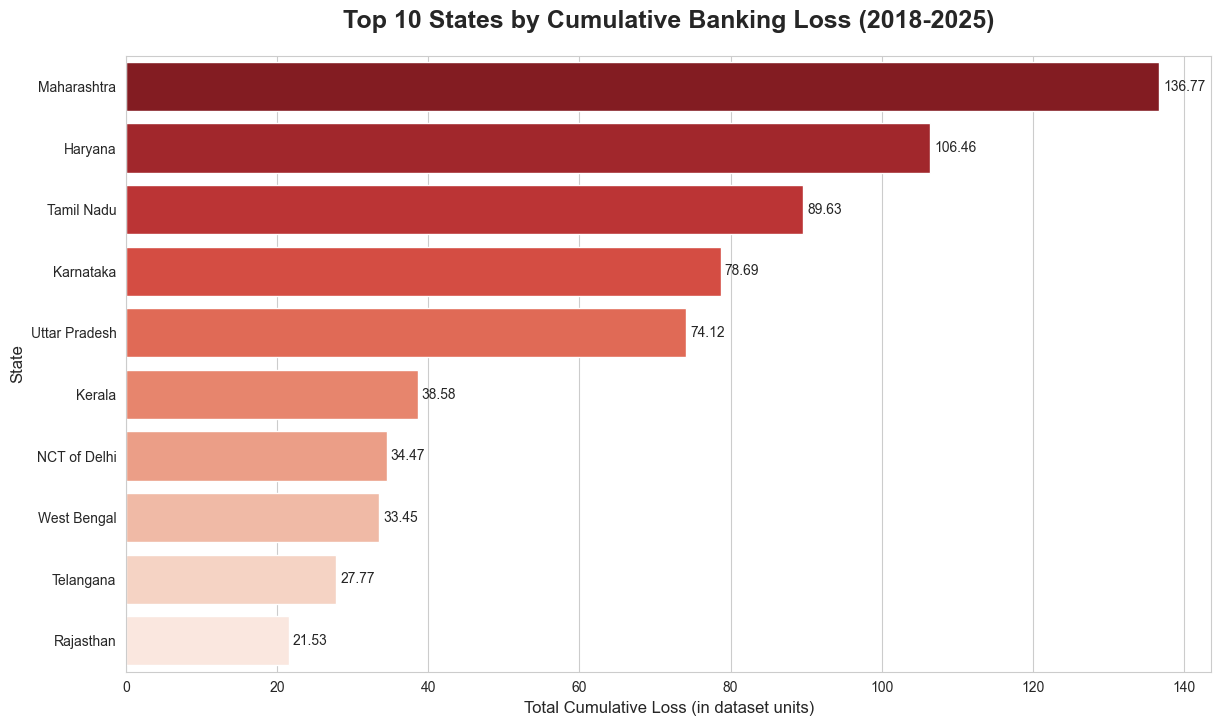

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")

# Excluding total to compare states:
df_states_only = df[df['State'] != 'Total']

top_10_hotspots = df_states_only.sort_values(by='Cumulative_Loss', ascending=False).head(10)

# --- Create the plot ---
plt.figure(figsize=(14, 8)) # Make the figure wider to fit state names and labels

# palette='Reds_r': A color scheme. '_r' reverses it, so the highest value is the darkest red.
barplot = sns.barplot(
    y='State', 
    x='Cumulative_Loss', 
    data=top_10_hotspots,
    palette='Reds_r' 
)

# --- Add professional titles and labels ---
plt.title('Top 10 States by Cumulative Banking Loss (2018-2025)', fontsize=18, fontweight='bold', pad=20)
plt.xlabel('Total Cumulative Loss (in dataset units)', fontsize=12)
plt.ylabel('State', fontsize=12)

# --- Add data labels to each bar for clarity ---
# This loop goes through each bar in the plot and writes the value next to it.
for container in barplot.containers:
    barplot.bar_label(container, fmt='%.2f', padding=3)

plt.show()

**Risk concentrated in 2 tiers:**
- Tier 1 (> 100 in loss): Maharashtra, Haryana
- Tier 2: TN, Karnataka, Uttar Pradesh


**Significant finding:**
- . The drop from Uttar Pradesh's 74 units to Kerala's 38 units is the largest proportional gap in the dataset.
- This confirms that regulatory and risk management efforts should be overwhelmingly focused on these top five hotspots.

##### 4.2. What is the risk profile of these hotspots? (Loss vs. Volatility)


- use scatterplot - to show the relationship between two numeric variables (Cumulative_Loss and Volatility)

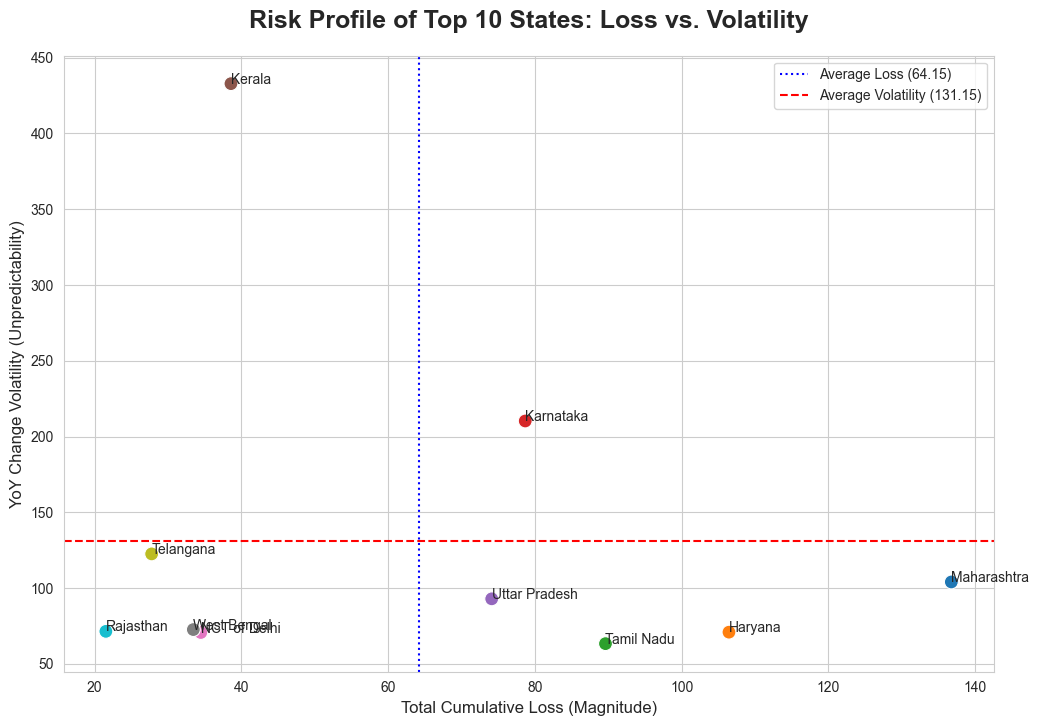

In [ ]:
plt.figure(figsize=(12, 8))

sns.scatterplot(
    x='Cumulative_Loss', 
    y='Volatility', 
    data=top_10_hotspots, 
    s=100, # Make the points larger
    hue='State',
    legend=False
)

for i, row in top_10_hotspots.iterrows():
    plt.text(row['Cumulative_Loss'] + 1, row['Volatility'], row['State']) # (x, y, text)  --> (x+1) so 'State' text doesnt land exactly on the dot

# --- Add lines for the average loss and volatility to create quadrants ---
# This helps visually segment the chart into our 2x2 risk matrix.
avg_loss = top_10_hotspots['Cumulative_Loss'].mean()
avg_volatility = top_10_hotspots['Volatility'].mean()

plt.axvline(x=avg_loss, color='blue', linestyle=':', label=f'Average Loss ({avg_loss:.2f})')
plt.axhline(y=avg_volatility, color='red', linestyle='--', label=f'Average Volatility ({avg_volatility:.2f})')


# --- Add professional titles and labels ---
plt.title('Risk Profile of Top 10 States: Loss vs. Volatility', fontsize=18, fontweight='bold', pad=20)
plt.xlabel('Total Cumulative Loss (Magnitude)', fontsize=12)
plt.ylabel('YoY Change Volatility (Unpredictability)', fontsize=12)
plt.legend() # This displays the labels for our average lines

# --- Display the final plot ---
plt.show()


**2x2 risk matrix:**
- High Loss, Low Volatility: Chronic, predictable problems.
- High Loss, High Volatility: The worst-case. Large and unpredictable problems.
- Low Loss, High Volatility: Unstable states that could become future problems.
- Low Loss, Low Volatility: The ideal, stable states.

**1. High Loss, High Volatility (Danger Zone):**
*   **Karnataka** : high total losses with extreme unpredictability.

**2. High Loss, Low Volatility (Chronic Zone):**
*   **Maharashtra, Haryana, Tamil Nadu, and Uttar Pradesh** : largest contributors to total losses, but their risk is predictable.

**3. Low Loss, High Volatility (Ticking Time Bomb Zone):**
*   **Kerala** : While its total loss is moderate, its extreme instability makes it a major hidden risk-  prone to sudden and explosive loss.

**4. Low Loss, Low Volatility (Managed Risk Zone):**
*   **Telangana, Rajasthan, and West Bengal** : most stable group- losses are lower and more predictable.

### 4.3. Which states are the emerging threats? (Analysis by Growth Rate)

C:\Users\KRISTINE\AppData\Local\Temp\ipykernel_30448\2396451434.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(


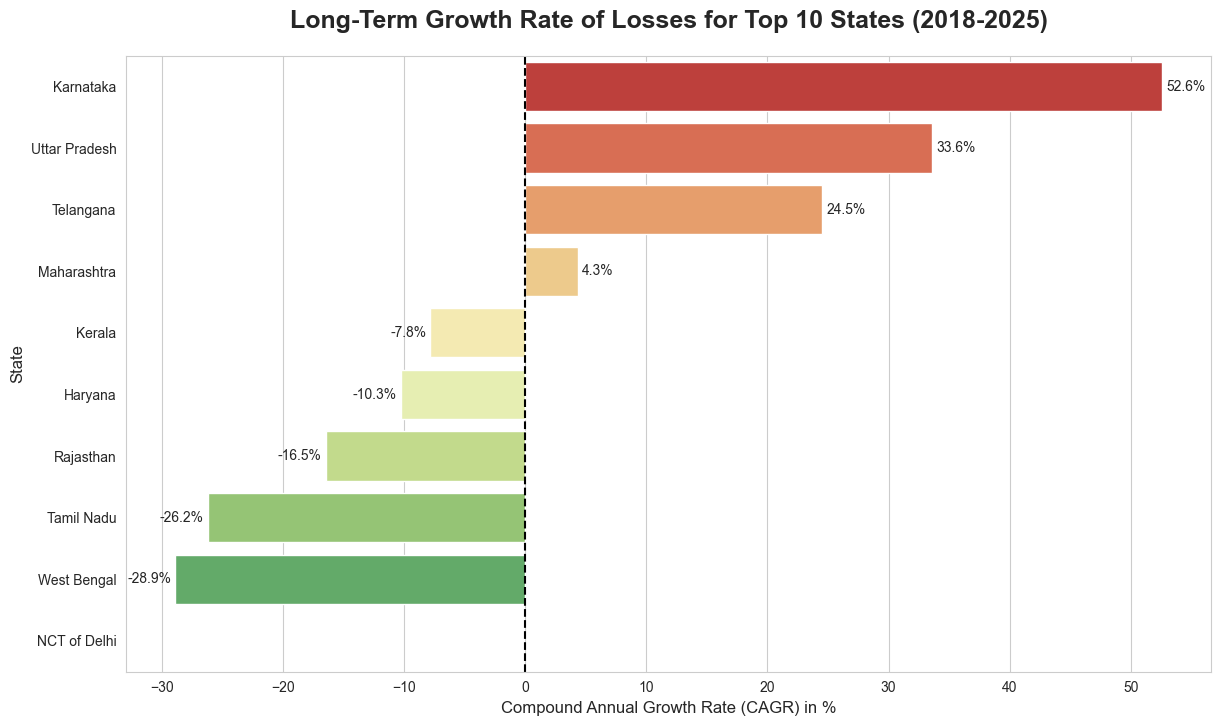

In [51]:
top_10_cagr = top_10_hotspots.sort_values(by='CAGR', ascending=False)

plt.figure(figsize=(14, 8))

# We use a diverging color palette. 
# It will automatically use "hot" colors (like red) for high positive values (bad growth)
# and "cool" colors (like green/blue) for negative values (good, i.e., losses are decreasing).
# '_r' reverses it to make red the high end.
barplot = sns.barplot(
    y='State',
    x='CAGR',
    data=top_10_cagr,
    palette='RdYlGn' 
)

plt.title('Long-Term Growth Rate of Losses for Top 10 States (2018-2025)', fontsize=18, fontweight='bold', pad=20)
plt.xlabel('Compound Annual Growth Rate (CAGR) in %', fontsize=12)
plt.ylabel('State', fontsize=12)
# Add a vertical line at 0% to clearly separate positive growth from negative growth
plt.axvline(x=0, color='black', linestyle='--')

# We format the labels to show one decimal place and a '%' sign.
for container in barplot.containers:
    barplot.bar_label(container, fmt='%.1f%%', padding=3)

plt.show()

**Positive CAGR (+%):** A positive value means that, on average, the state's banking losses are growing each year. The bigger the positive number, the faster the problem is compounding and getting worse. These are the states with worsening long-term trends.

**Negative CAGR (-%):** A negative value means that, on average, the state's banking losses are shrinking each year. A large negative number indicates a strong trend of improvement and recovery over the long term. These are the states with improving long-term trends.

#### **FINAL FINDINGS**

*   **Karnataka:** High Cumulative Loss, High Volatility, High Positive CAGR.
    *    most critical risk: a large, unpredictable problem that is growing explosively.

*   **Maharashtra:** High Cumulative Loss, Low Volatility, Low Positive CAGR.
    *   massive, chronic problem that is very large but stable and not escalating quickly.

*   **Haryana & Tamil Nadu:** High Cumulative Loss, Low Volatility, Negative CAGR.
    *    on a strong long-term recovery trend.

*   **Kerala:** Low Cumulative Loss, High Volatility, Negative CAGR.
    *   "ticking time bomb" whose main risk is extreme unpredictability, not its overall size or growth.

*   **Uttar Pradesh & Telangana:** High/Low Cumulative Loss, Low Volatility, High Positive CAGR.
    *   Key emerging threats whose problems are growing much faster than other major states.

### 5. Interactive Dashboard